In [1221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings .filterwarnings('ignore')
pd.set_option('display.max_columns', 47)
pd.set_option('display.max_rows', 50)
path='E:/Mineetha/Upgrad/Data/'

In [1222]:
#read the data
df=pd.read_csv(path+"CarPrice_Assignment.csv")

# DATA UNDERSTANDING

In [1223]:
#understand the data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1224]:
#size of dataframe

df.shape

(205, 26)

In [1225]:
#concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1226]:
#basic statistical details of numerical columns
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data formatting

In [1227]:

#CarName=carcompany+carmodel
df['carcompany']=df.CarName.str.split(" ",1).str[0]




In [1228]:
df.carcompany.nunique()


28

In [1229]:
df.carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [1230]:
# There are some spelling mistakes in the car company name.
# Also uppercase and lowercase conflict too are there. So let us first convert all into lower case
df['carcompany']=df.carcompany.str.lower()
df.carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [1231]:
#let us correct the spelling mistakes
def replace_name(a,b):
    df.carcompany.replace(a,b,inplace=True)

replace_name('maxda', 'mazda')
replace_name('porcshce','porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

In [1232]:
df.carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1233]:
df.carcompany.nunique()

22

In [1234]:

df=df.drop(['CarName'],axis=1)

In [1235]:
#Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by
#weighting the City value by 55% and the Highway value by 45%.
df['total_mpg']=(55*df['citympg']/100)+(45*df['highwaympg']/100)



In [1236]:
df=df.drop(['citympg','highwaympg'],axis=1)

In [1237]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carcompany,total_mpg
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,23.70
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,23.70
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.15
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,26.70
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,19.80


# data visualization of numeric variables 

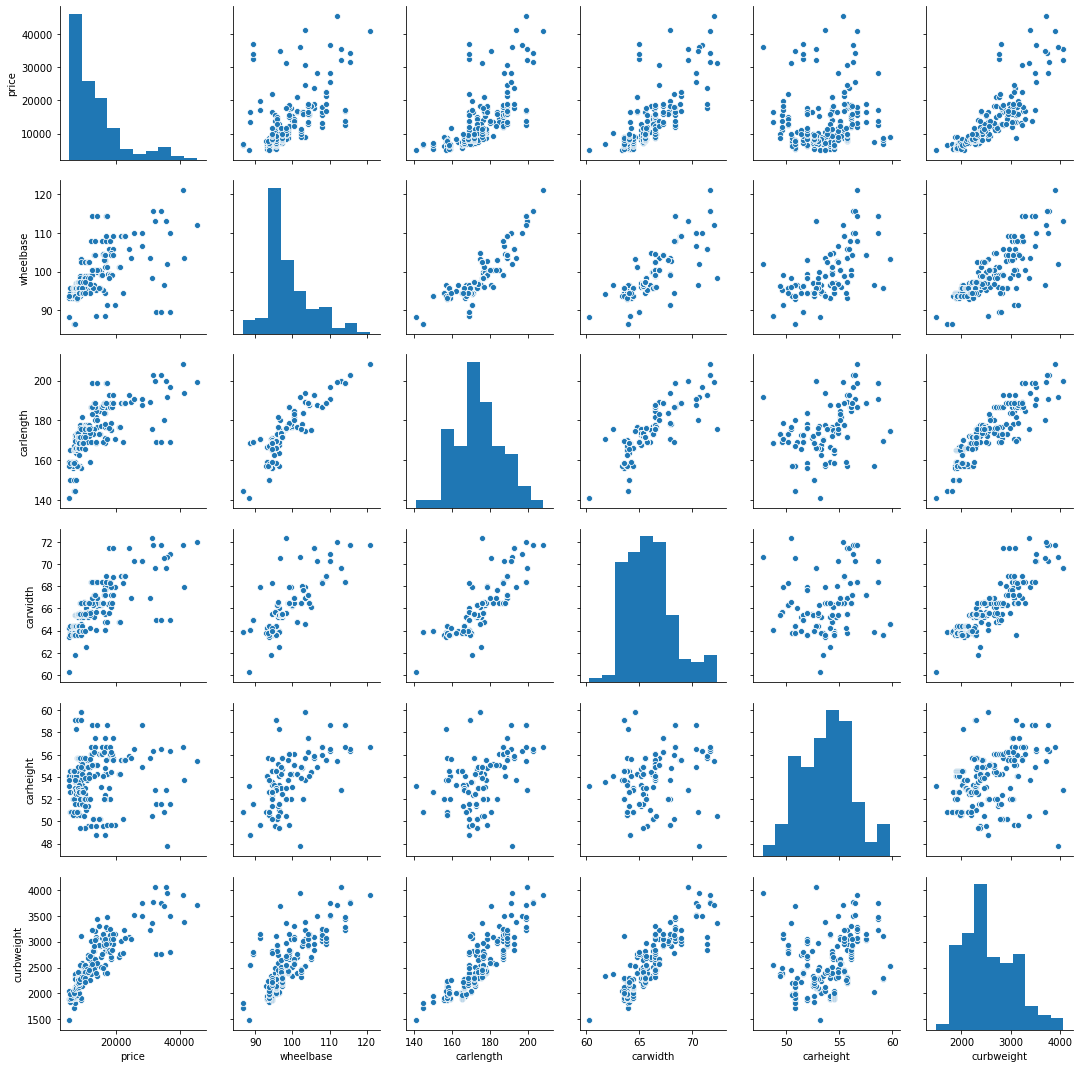

In [1238]:

sns.pairplot(df, vars=['price','wheelbase','carlength','carwidth','carheight','curbweight'])
plt.show()

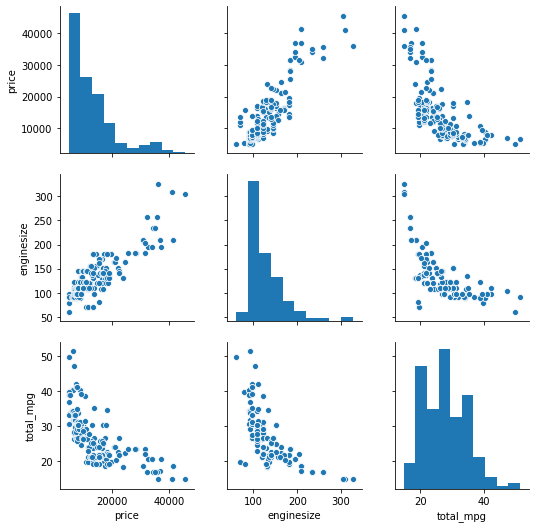

In [1239]:

sns.pairplot(df, vars=['price','enginesize','total_mpg'])
plt.show()

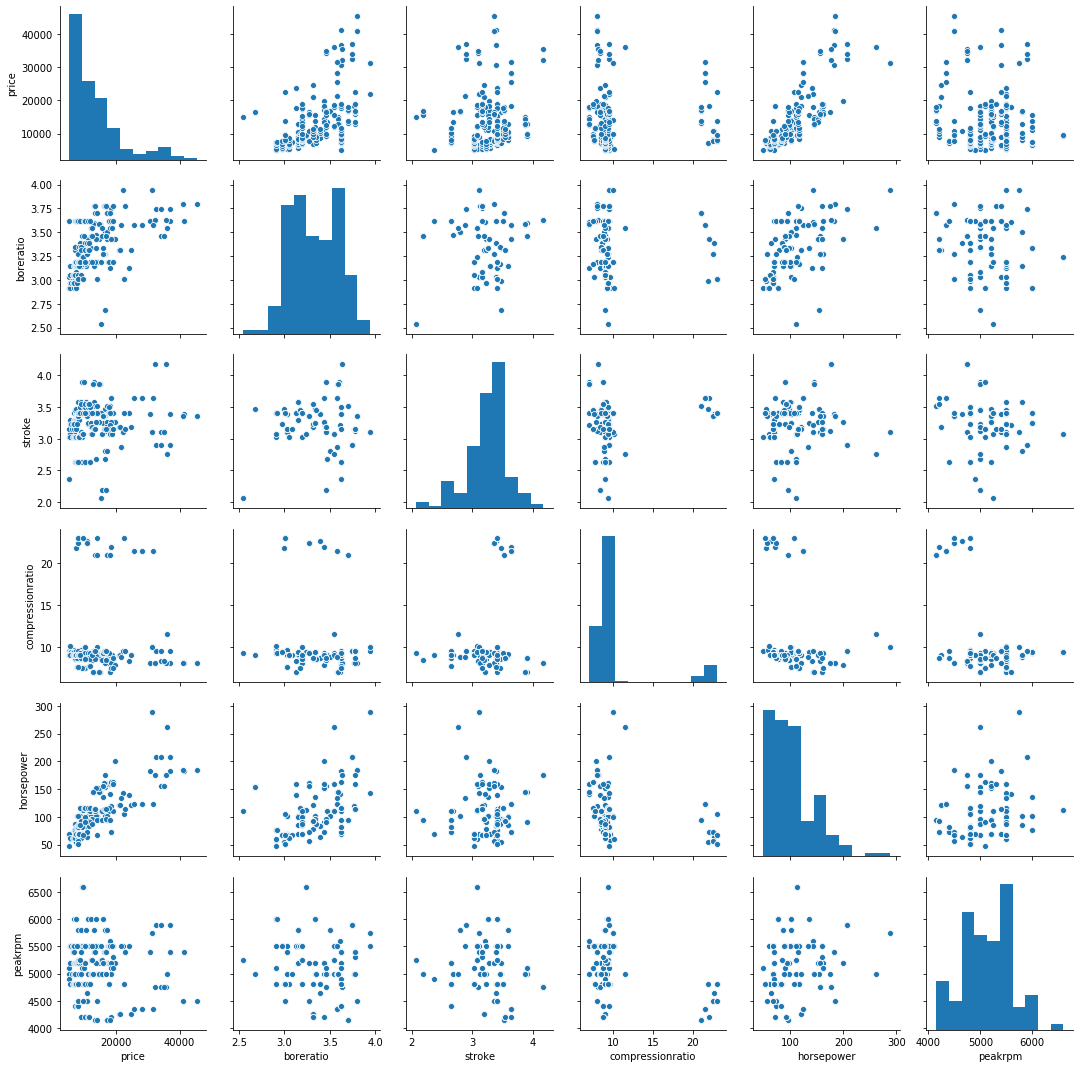

In [1240]:

sns.pairplot(df, vars=['price','boreratio','stroke','compressionratio','horsepower','peakrpm'])
plt.show()

# Visualizing category variables -  bar plot, box plot and histogram


In [1241]:
#function for integrating different plots visualizing category variables 
#bar plot, box plot with price and histogram
  
def plotBarAndBoxPlots_with_price(a):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.barplot(x=a,y=df.price,data=df)
    plt.xticks(rotation=45)
    plt.subplot(1,3,2)
    a.value_counts().plot('bar')
    plt.subplot(1,3,3)
    plt.xticks(rotation=45)
    sns.boxplot(x=a,y='price',data=df)
    plt.show()
    



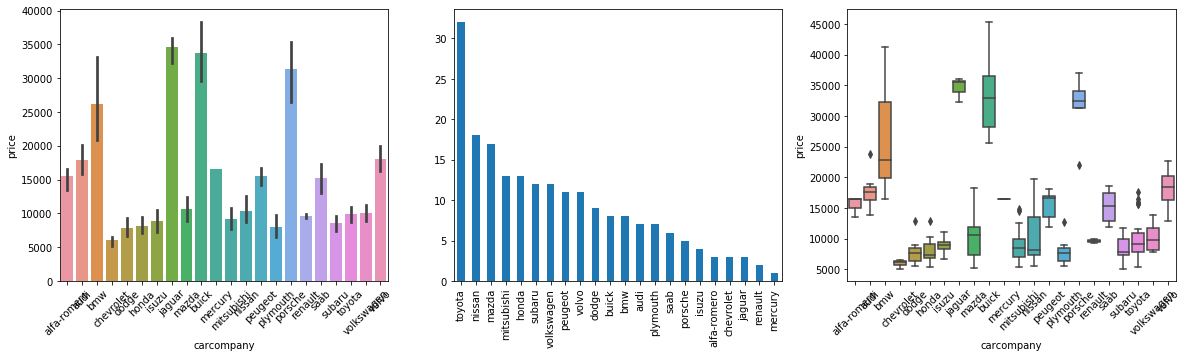

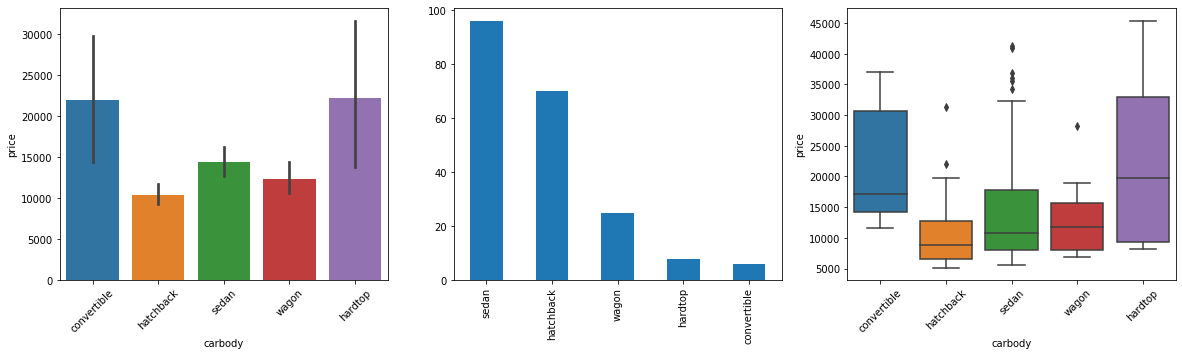

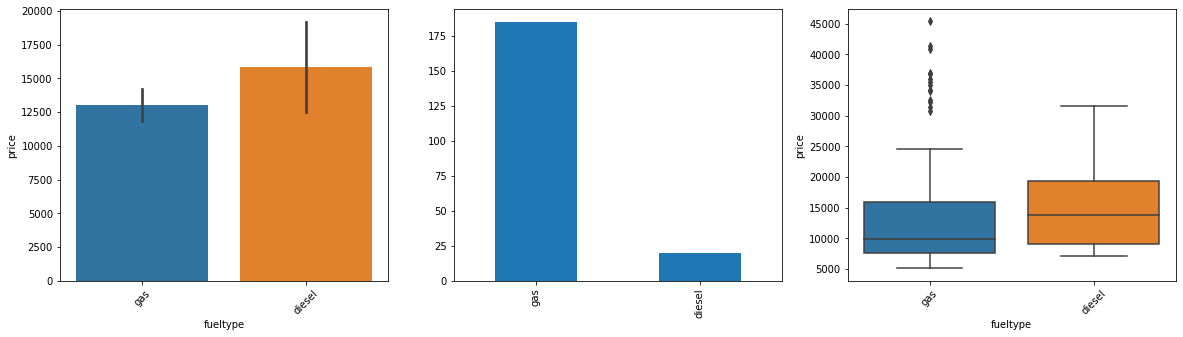

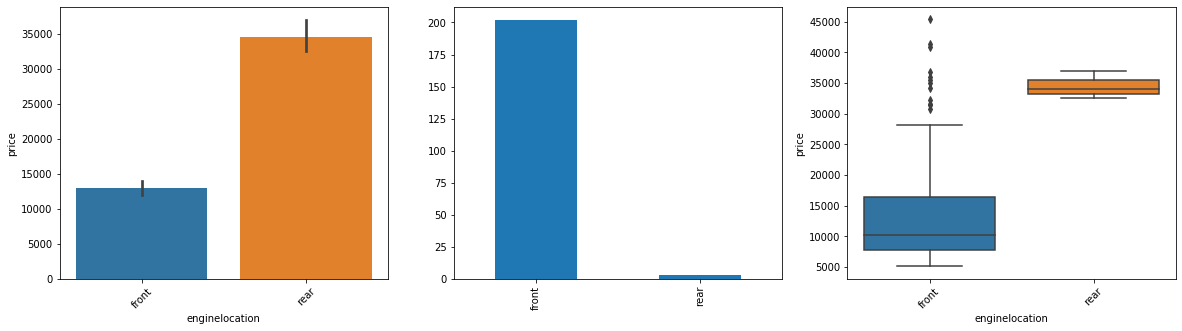

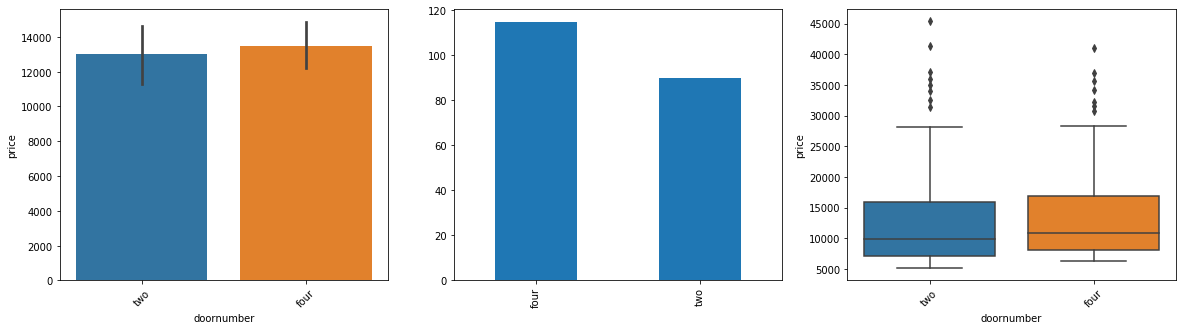

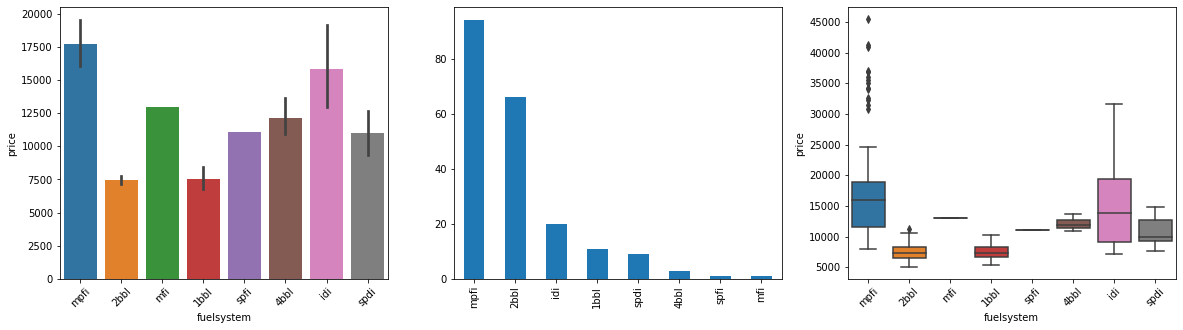

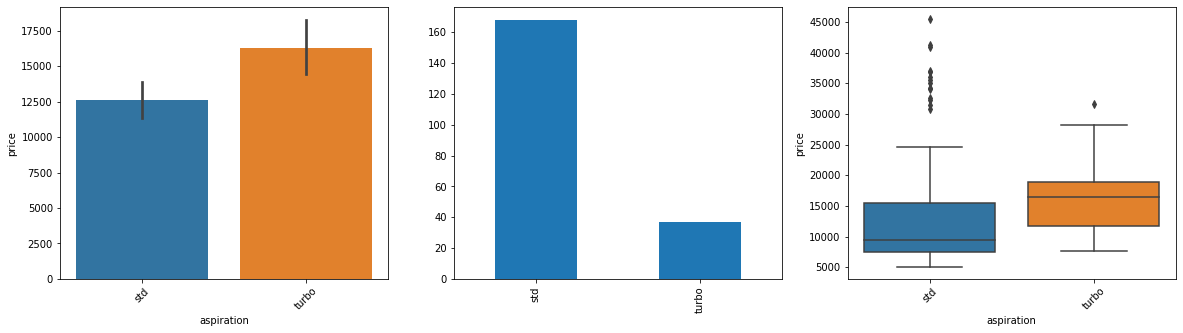

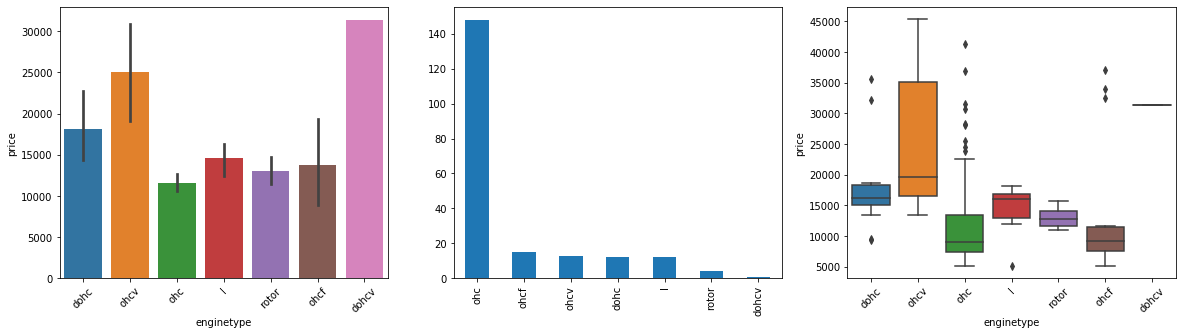

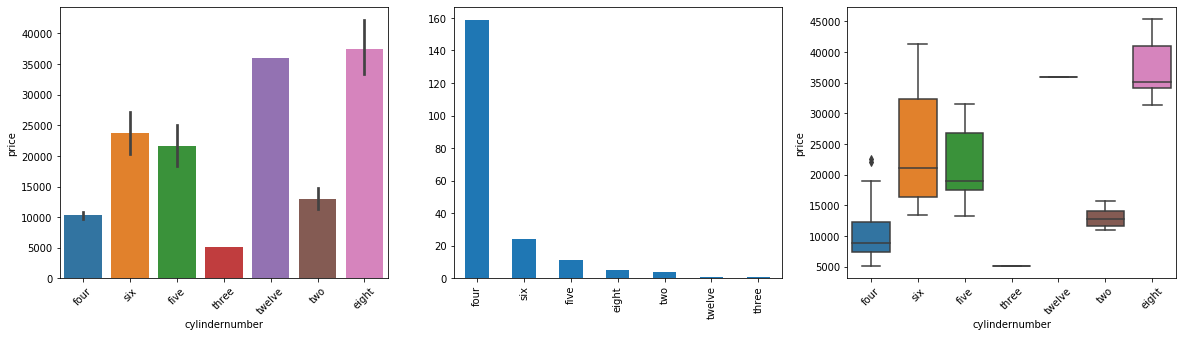

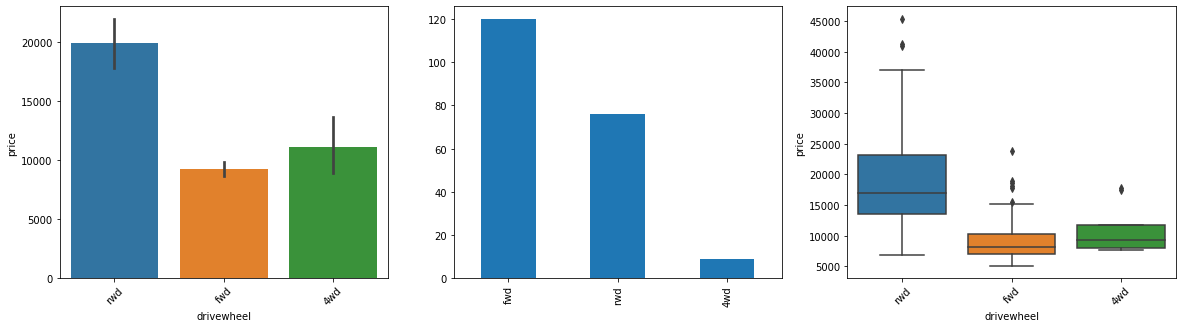

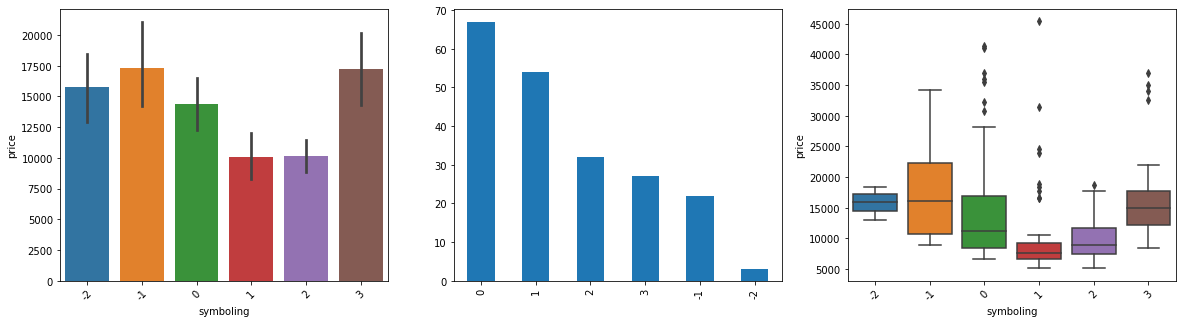

In [1242]:
plotBarAndBoxPlots_with_price(df.carcompany)
plotBarAndBoxPlots_with_price(df.carbody)
plotBarAndBoxPlots_with_price(df.fueltype)
plotBarAndBoxPlots_with_price(df.enginelocation)
plotBarAndBoxPlots_with_price(df.doornumber)                              
plotBarAndBoxPlots_with_price(df.fuelsystem)
plotBarAndBoxPlots_with_price(df.aspiration)
plotBarAndBoxPlots_with_price(df.enginetype)
plotBarAndBoxPlots_with_price(df.cylindernumber)
plotBarAndBoxPlots_with_price(df.drivewheel)
plotBarAndBoxPlots_with_price(df.symboling)
                            

In [1243]:
#Correlation Matrix and Heatmap to visualize multicollinearity

(15.0, 0.0)

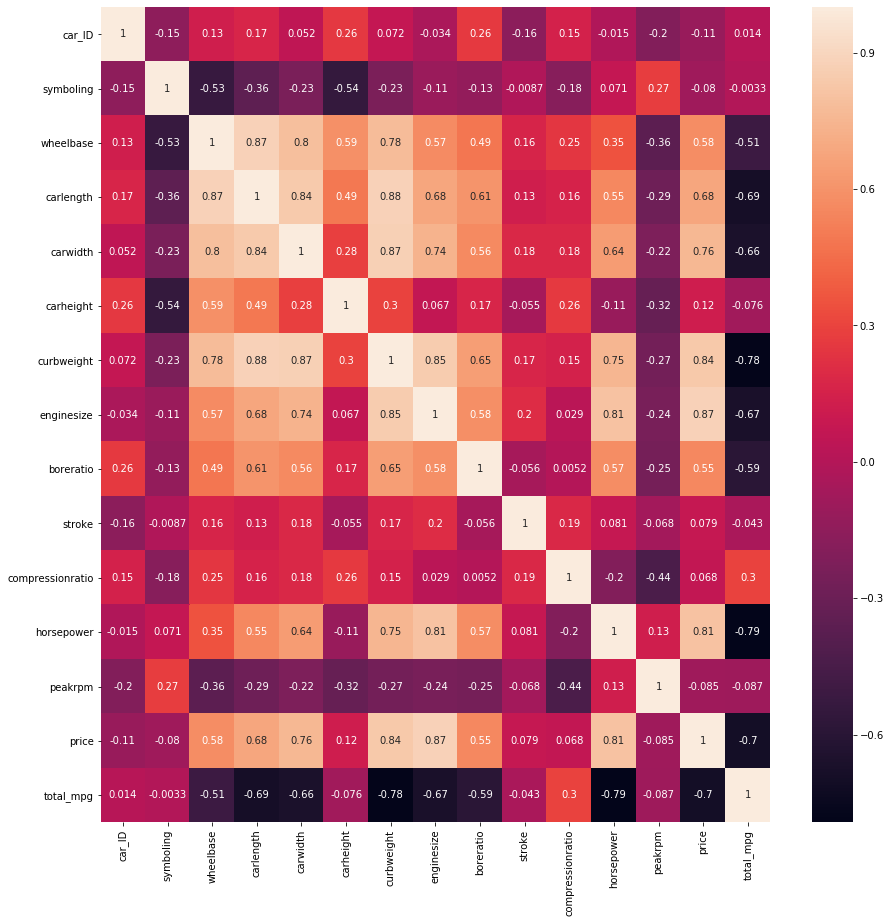

In [1244]:
plt.figure(figsize=(15,15))
ax=sns.heatmap(df.corr(),annot=True)
top,bot=ax.get_ylim()
ax.set_ylim(top+0.5,bot-0.5)

In [1245]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.682920,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.119336,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.079443,-0.043281


# Feature Selection

#Now, we need to select features using which we can model our price using linear regression.
So, we will look at how much correlation each feature has with price. 
Correlation explains how much two things are related to each other.
Correlation helps us the choose the most important variables to model after.



In [1246]:
df.shape

(205, 25)

In [1247]:
#we have 25 variables. from these we have to remove variables which ae less correlated (+0.45 and -0.45) with price
cols_to_drop=df.corr()[(df.corr()['price']<=0.45) & (df.corr()['price']>=-0.45)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)



In [1248]:
print(cols_to_drop)

['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']


In [1249]:
#We will drop these 6 variables
df= df.drop(cols_to_drop,axis=1)

In [1250]:
df.shape

(205, 19)

In [1251]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'price', 'carcompany', 'total_mpg'],
      dtype='object')

# Checking  multicollinearity among the remaining numerical variables and their correlation with price 
#1. Car dimensions


In [1252]:
df[['wheelbase', 'carlength', 'carwidth','curbweight','price']].corr()

,wheelbase,carlength,carwidth,curbweight,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.835305
price,0.577816,0.682920,0.759325,0.835305,1.000000


In [1253]:
#we can drop the 3 columns,'wheelbase', 'carlength',carwidth because they are highly correlated.
df=df.drop(['wheelbase', 'carlength','carwidth'],axis=1)


In [1254]:

#2. Car engine related variables
df[['enginesize','horsepower','total_mpg','price']].corr()


,enginesize,horsepower,total_mpg,price
enginesize,1.000000,0.809769,-0.669464,0.874145
horsepower,0.809769,1.000000,-0.792822,0.808139
total_mpg,-0.669464,-0.792822,1.000000,-0.696213
price,0.874145,0.808139,-0.696213,1.000000


In [1255]:
#We are  dropping 'horsepower'
df=df.drop(['horsepower'],axis=1)

In [1256]:
df.shape

(205, 15)

In [1257]:
df.columns


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'price', 'carcompany',
       'total_mpg'],
      dtype='object')

# Encoding & dummy variables - data preparation for modelling

    #1. binary to 1's and 0's
    #2. other cat vars to dummy vars.Then drop the redundant dummy var. No of dummy variables= categorical values-1


In [1258]:
#cat vars with 2 levels
df = pd.get_dummies(df, columns=['fueltype'],drop_first=True)
df = pd.get_dummies(df, columns=['enginelocation'],drop_first=True)
df = pd.get_dummies(df, columns=['doornumber'],drop_first=True)
df = pd.get_dummies(df, columns=['aspiration'],drop_first=True)


In [1259]:
#cat vars with more than 2 levels
df = pd.get_dummies(df, columns=['drivewheel'],drop_first=True)
df = pd.get_dummies(df, columns=['carbody'],drop_first=True)
df = pd.get_dummies(df, columns=['enginetype'],drop_first=True)
df = pd.get_dummies(df, columns=['cylindernumber'],drop_first=True)
df = pd.get_dummies(df, columns=['fuelsystem'],drop_first=True)
df = pd.get_dummies(df, columns=['carcompany'],drop_first=True)


In [1260]:
df.shape

(205, 55)

In [1261]:
df.head()

,curbweight,enginesize,boreratio,price,total_mpg,fueltype_gas,enginelocation_rear,doornumber_two,aspiration_turbo,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,...,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
0,2548,130,3.47,13495.0,23.70,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2548,130,3.47,16500.0,23.70,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2823,152,2.68,16500.0,22.15,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2337,109,3.19,13950.0,26.70,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2824,136,3.19,17450.0,19.80,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1262]:
df.corr()

,curbweight,enginesize,boreratio,price,total_mpg,fueltype_gas,enginelocation_rear,doornumber_two,aspiration_turbo,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,...,fuelsystem_spdi,fuelsystem_spfi,carcompany_audi,carcompany_bmw,carcompany_buick,carcompany_chevrolet,carcompany_dodge,carcompany_honda,carcompany_isuzu,carcompany_jaguar,carcompany_mazda,carcompany_mercury,carcompany_mitsubishi,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
curbweight,1.000000,0.850594,0.648480,0.835305,-0.781535,-0.217275,0.050468,-0.197379,0.324902,-0.666039,0.669987,0.098956,-0.287501,0.099425,0.164075,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,...,-0.002434,0.024052,0.088743,0.145028,0.442556,-0.187364,-0.166769,-0.229843,-0.092904,0.345315,-0.149218,0.047776,-0.086990,-0.092690,0.305064,-0.121164,0.102171,-0.006892,0.063495,-0.114888,-0.094786,-0.101966,0.221127
enginesize,0.850594,1.000000,0.583774,0.874145,-0.669464,-0.069594,0.196826,-0.020742,0.108217,-0.518391,0.565509,0.239363,-0.216805,0.088459,-0.027518,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,...,0.004490,-0.013327,0.017231,0.193885,0.483128,-0.136632,-0.125043,-0.172881,-0.082885,0.451076,-0.173061,0.022067,-0.053867,0.007331,0.051079,-0.093339,0.229487,0.012168,-0.024692,-0.118994,-0.083807,-0.117994,0.088077
boreratio,0.648480,0.583774,1.000000,0.553173,-0.589898,-0.054451,0.185042,-0.119258,0.212614,-0.583087,0.574105,0.208089,-0.227032,0.030517,0.105719,0.158136,0.181729,-0.410383,0.326798,0.119509,0.000127,-0.007797,-0.164076,...,-0.004213,0.025977,-0.109189,0.107399,0.205292,-0.153248,-0.186629,-0.296839,-0.067749,0.121894,-0.036392,0.116674,-0.076071,-0.086481,0.222951,-0.144979,0.286897,0.047848,0.028006,0.267866,-0.079203,-0.184355,0.293458
price,0.835305,0.874145,0.553173,1.000000,-0.696213,-0.105679,0.324973,-0.031835,0.177926,-0.601950,0.638957,0.225854,-0.262039,0.125716,-0.042310,0.159225,0.042267,-0.344270,0.016285,0.385991,-0.004544,0.249606,-0.697762,...,-0.061475,-0.019580,0.108117,0.324731,0.515094,-0.111168,-0.145233,-0.166260,-0.077182,0.326074,-0.099005,0.028344,-0.131811,-0.111383,0.066105,-0.125359,0.359581,-0.045856,0.042414,-0.148167,-0.182997,-0.100100,0.143017
total_mpg,-0.781535,-0.669464,-0.589898,-0.696213,1.000000,-0.227713,-0.130609,0.023651,-0.228080,0.585161,-0.559209,-0.107930,0.134749,0.013275,-0.087806,-0.060787,-0.047321,0.410279,-0.039485,-0.350394,-0.173255,-0.222566,0.547990,...,-0.116766,-0.015398,-0.183493,-0.171161,-0.245595,0.288294,0.098250,0.194597,0.117850,-0.212675,0.036404,-0.068176,0.000712,0.091969,-0.121068,0.088842,-0.153485,-0.016592,-0.110615,0.023009,0.144207,0.140017,-0.159415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
carcompany_saab,0.063495,-0.024692,0.028006,0.042414,-0.110615,0.057092,-0.021161,0.021335,0.069008,0.146140,-0.133279,-0.034991,0.058052,0.011034,-0.064712,-0.012157,-0.043297,-0.021426,-0.048789,-0.045182,-0.024495,-0.041347,0.093396,...,-0.037209,-0.012157,-0.032649,-0.034991,-0.034991,-0.021161,-0.037209,-0.045182,-0.024495,-0.021161,-0.052215,-0.012157,-0.045182,-0.053872,-0.041347,-0.032649,-0.027455,-0.017235,1.000000,-0.043297,-0.074679,-0.043297,-0.041347
carcompany_subaru,-0.114888,-0.118994,0.267866,-0.148167,0.023009,0.081986,-0.030388,-0.094976,-0.008961,-0.001029,-0.191392,-0.050249,-0.048095,-0.025798,0.161075,-0.017458,-0.062176,-0.401796,0.887448,-0.064883,-0.035176,-0.059376,0.134120,...,-0.053432,-0.017458,-0.046884,-0.050249,-0.050249,-0.030388,-0.053432,-0.064883,-0

In [1263]:
#we have 56 variables. from these we have to remove variables which ae less correlated (+0.45 and -0.45) with price
cols_to_drop=df.corr()[(df.corr()['price']<=0.45) & (df.corr()['price']>=-0.45)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)


In [1264]:
df=df.drop(cols_to_drop,axis=1)

In [1265]:
df.shape

(205, 12)

In [1266]:
df.columns

Index(['curbweight', 'enginesize', 'boreratio', 'price', 'total_mpg',
       'drivewheel_fwd', 'drivewheel_rwd', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_mpfi',
       'carcompany_buick'],
      dtype='object')

# Target Variable, Price

In [1267]:
df.price.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.85,0.95,0.99])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
1%        5201.120000
5%        6197.000000
10%       6657.000000
25%       7788.000000
50%      10295.000000
85%      18500.000000
95%      32472.400000
99%      40802.720000
max      45400.000000
Name: price, dtype: float64

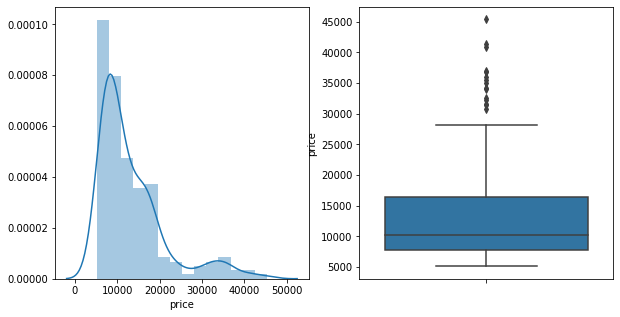

In [1268]:
#plotting the target variable price
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["price"])
plt.subplot(1,2,2)
sns.boxplot(y=df["price"])
plt.show()


# Train-Test split

In [1269]:

df_train, df_test = train_test_split(df,train_size=0.7,random_state=100)

In [1270]:
print(df_train.shape)
print(df_test.shape)


(143, 12)
(62, 12)


In [1271]:
df_train.head()


,curbweight,enginesize,boreratio,price,total_mpg,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_mpfi,carcompany_buick
122,2191,98,2.97,7609.0,34.15,1,0,1,0,1,0,0
125,2778,151,3.94,22018.0,22.60,0,1,1,0,0,1,0
166,2300,98,3.24,9538.0,27.35,0,1,1,0,0,1,0
1,2548,130,3.47,16500.0,23.70,0,1,1,0,0,1,0
199,3157,130,3.62,18950.0,19.25,0,1,1,0,0,1,0


# Scaling

In [1272]:

#creating a list of numerical variables to be scaled

num_vars=['curbweight','enginesize', 'boreratio', 'price','total_mpg']
     
df_train[num_vars]

,curbweight,enginesize,boreratio,price,total_mpg
122,2191,98,2.97,7609.0,34.15
125,2778,151,3.94,22018.0,22.60
166,2300,98,3.24,9538.0,27.35
1,2548,130,3.47,16500.0,23.70
199,3157,130,3.62,18950.0,19.25
...,...,...,...,...,...
87,2403,110,3.17,9279.0,26.15
103,3060,181,3.43,13499.0,21.70
67,3515,183,3.58,25552.0,23.35
24,1967,90,2.97,6229.0,34.15


In [1273]:
#rescaling features #Min-Max scaling after train=test split
#instantiating an object
scaler=MinMaxScaler()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [1274]:
df_train.head()

,curbweight,enginesize,boreratio,price,total_mpg,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_mpfi,carcompany_buick
122,0.272692,0.139623,0.230159,0.068818,0.530864,1,0,1,0,1,0,0
125,0.500388,0.339623,1.000000,0.466890,0.213992,0,1,1,0,0,1,0
166,0.314973,0.139623,0.444444,0.122110,0.344307,0,1,1,0,0,1,0
1,0.411171,0.260377,0.626984,0.314446,0.244170,0,1,1,0,0,1,0
199,0.647401,0.260377,0.746032,0.382131,0.122085,0,1,1,0,0,1,0


In [1275]:
df_train.describe()

,curbweight,enginesize,boreratio,price,total_mpg,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_mpfi,carcompany_buick
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.407878,0.241351,0.497946,0.219310,0.358265,0.594406,0.349650,0.741259,0.132867,0.349650,0.440559,0.034965
std,0.211269,0.154619,0.207140,0.215682,0.185980,0.492733,0.478536,0.439483,0.340624,0.478536,0.498199,0.184337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245539,0.135849,0.305556,0.067298,0.198903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.355702,0.184906,0.500000,0.140343,0.344307,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.559542,0.301887,0.682540,0.313479,0.512346,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1276]:
#Once again checking correlation among variables and the target variable Price

In [1277]:
df_train[df_train.columns].corr()

,curbweight,enginesize,boreratio,price,total_mpg,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_mpfi,carcompany_buick
curbweight,1.000000,0.865102,0.625759,0.861860,-0.765596,-0.691805,0.687311,-0.593859,0.455979,-0.593771,0.526508,0.404193
enginesize,0.865102,1.000000,0.545157,0.867915,-0.640374,-0.524765,0.582234,-0.613032,0.561996,-0.475134,0.509074,0.365687
boreratio,0.625759,0.545157,1.000000,0.533591,-0.541146,-0.517488,0.507992,-0.138491,0.110833,-0.359207,0.399859,0.164369
price,0.861860,0.867915,0.533591,1.000000,-0.685319,-0.635202,0.677169,-0.695256,0.500613,-0.537919,0.519993,0.437268
total_mpg,-0.765596,-0.640374,-0.541146,-0.685319,1.000000,0.596144,-0.556367,0.573745,-0.400490,0.562936,-0.643283,-0.199745
drivewheel_fwd,-0.691805,-0.524765,-0.517488,-0.635202,0.596144,1.000000,-0.887644,0.487582,-0.389954,0.426487,-0.414469,-0.230431
drivewheel_rwd,0.687311,0.582234,0.507992,0.677169,-0.556367,-0.887644,1.000000,-0.504389,0.447446,-0.476129,0.412718,0.259598
cylindernumber_four,-0.593859,-0.613032,-0.138491,-0.695256,0.573745,0.487582,-0.504389,1.000000,-0.662549,0.399718,-0.408457,-0.322179
cylindernumber_six,0.455979,0.561996,0.110833,0.500613,-0.400490,-0.389954,0.447446,-0.662549,1.000000,-0.287018,0.399605,-0.074509
fuelsystem_2bbl,-0.593771,-0.475134,-0.359207,-0.537919,0.562936,0.426487,-0.476129,0.399718,-0.287018,1.000000,-0.650682,-0.139569


In [1278]:


df_train.shape

(143, 12)

In [1279]:
y_train = df_train.pop('price')
X_train = df_train

In [1280]:
print(y_train.shape)

(143,)


In [1281]:
print(X_train.shape)

(143, 11)


# Model Building

In [1282]:
def create_model(X,y):
    #adding constant
    #sm.add_constant(X)
    #create model
    lr = sm.OLS(y,X)
    #fit model
    lr_model=lr.fit()
    # model summary
    print(lr_model.summary())
    
    
    

In [1283]:
def find_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

  



# MODEL 1

In [1284]:
#Adding constants to X-train
X_train_sm=sm.add_constant(X_train)
create_model(X_train_sm,y_train)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     69.37
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.93e-49
Time:                        23:18:34   Log-Likelihood:                 154.27
No. Observations:                 143   AIC:                            -284.5
Df Residuals:                     131   BIC:                            -249.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0345    

In [1285]:
find_vif(X_train)

               Features    VIF
0            curbweight  25.59
1            enginesize  18.32
2             boreratio  15.17
6   cylindernumber_four  11.92
3             total_mpg  11.15
4        drivewheel_fwd  10.07
5        drivewheel_rwd   7.36
9       fuelsystem_mpfi   3.72
7    cylindernumber_six   3.24
8       fuelsystem_2bbl   2.96
10     carcompany_buick   1.85


# MODEL 2

In [1286]:
#p-vale of 'drivewheel_fwd' seems to be higher than the significance value of 0.05,
#hence dropping it as it is insignificant in presence of other variables.
X=X_train.drop('drivewheel_fwd',axis=1)


In [1287]:
X_train_sm=sm.add_constant(X)
create_model(X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     76.89
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.36e-50
Time:                        23:18:35   Log-Likelihood:                 154.27
No. Observations:                 143   AIC:                            -286.5
Df Residuals:                     132   BIC:                            -254.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0337    

In [1288]:
find_vif(X)

              Features    VIF
0           curbweight  25.49
1           enginesize  17.85
2            boreratio  15.16
5  cylindernumber_four  11.41
3            total_mpg   7.74
8      fuelsystem_mpfi   3.61
4       drivewheel_rwd   3.37
6   cylindernumber_six   3.21
7      fuelsystem_2bbl   2.95
9     carcompany_buick   1.84


# MODEL3

In [1289]:
#p-vale of 'total_mpg' seems to be higher than the significance value of 0.05,
#hence dropping it as it is insignificant in presence of other variables.
X=X.drop('total_mpg',axis=1)
X_train_sm=sm.add_constant(X)
create_model(X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     86.08
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.57e-51
Time:                        23:18:35   Log-Likelihood:                 154.27
No. Observations:                 143   AIC:                            -288.5
Df Residuals:                     133   BIC:                            -258.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0365    

In [1290]:
find_vif(X)

              Features    VIF
0           curbweight  25.49
1           enginesize  17.78
2            boreratio  15.04
4  cylindernumber_four   6.03
7      fuelsystem_mpfi   3.58
3       drivewheel_rwd   3.37
5   cylindernumber_six   2.96
6      fuelsystem_2bbl   2.65
8     carcompany_buick   1.79


# MODEL 4

In [1291]:
# 'Curbweight is  highly correlated with other variables. Its VIF value is 25.49. So we can drop this variable.
X=X.drop('curbweight',axis=1)
X_train_sm=sm.add_constant(X)
create_model(X_train_sm,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     93.69
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.43e-51
Time:                        23:18:36   Log-Likelihood:                 151.80
No. Observations:                 143   AIC:                            -285.6
Df Residuals:                     134   BIC:                            -258.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0709    

In [1292]:
find_vif(X)

              Features    VIF
1            boreratio  13.03
0           enginesize  10.54
3  cylindernumber_four   5.79
6      fuelsystem_mpfi   3.55
2       drivewheel_rwd   3.12
4   cylindernumber_six   2.94
5      fuelsystem_2bbl   2.60
7     carcompany_buick   1.70


# MODEL5

In [1293]:
#p-vale of 'fuelsystem_mpfi' seems to be higher than the significance value of 0.05,
#hence dropping it as it is insignificant in presence of other variables.
X=X.drop('fuelsystem_mpfi',axis=1)
X_train_sm=sm.add_constant(X)
create_model(X_train_sm,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.32e-52
Time:                        23:18:36   Log-Likelihood:                 151.53
No. Observations:                 143   AIC:                            -287.1
Df Residuals:                     135   BIC:                            -263.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0775    

In [1294]:
find_vif(X)

              Features    VIF
1            boreratio  12.29
0           enginesize   9.99
3  cylindernumber_four   5.74
2       drivewheel_rwd   3.12
4   cylindernumber_six   2.87
5      fuelsystem_2bbl   2.05
6     carcompany_buick   1.64


# MODEL 6

In [1295]:
# VIF of 'boreratio' is 12.29 which is a high value indicating that it is highly correlated with other variables    
X=X.drop('boreratio',axis=1)
X_train_sm=sm.add_constant(X)
create_model(X_train_sm,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.57e-52
Time:                        23:18:37   Log-Likelihood:                 149.69
No. Observations:                 143   AIC:                            -285.4
Df Residuals:                     136   BIC:                            -264.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0940    

In [1296]:
find_vif(X)


              Features   VIF
0           enginesize  5.76
2  cylindernumber_four  3.98
3   cylindernumber_six  2.79
1       drivewheel_rwd  2.61
4      fuelsystem_2bbl  2.05
5     carcompany_buick  1.63


# MODEL 7

In [1297]:
#p-vale of 'carcompany_buick' seems to be higher than the significance value of 0.05,
#hence dropping it as it is insignificant in presence of other variables.
X=X.drop('carcompany_buick',axis=1)
X_train_sm=sm.add_constant(X)
create_model(X_train_sm,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.99e-53
Time:                        23:18:37   Log-Likelihood:                 148.24
No. Observations:                 143   AIC:                            -284.5
Df Residuals:                     137   BIC:                            -266.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1004    

In [1298]:
find_vif(X)

              Features   VIF
0           enginesize  4.31
2  cylindernumber_four  3.16
1       drivewheel_rwd  2.56
3   cylindernumber_six  2.10
4      fuelsystem_2bbl  1.99


# MODEL 8

In [1299]:
X=X.drop('fuelsystem_2bbl',axis=1)
X_train_sm=sm.add_constant(X)
create_model(X_train_sm,y_train)

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     176.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.02e-53
Time:                        23:18:39   Log-Likelihood:                 146.48
No. Observations:                 143   AIC:                            -283.0
Df Residuals:                     138   BIC:                            -268.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025   

In [1300]:
find_vif(X)

              Features   VIF
0           enginesize  4.31
1       drivewheel_rwd  2.44
3   cylindernumber_six  2.04
2  cylindernumber_four  1.94


# Selecting MODEL 8
Predictors are:

1. enginesize 
2. drivewheel_rwd  
3. cylindernumber_six  
4. cylindernumber_four

All the selected predictors are with p value less than the significance level of 0.05. THis indicates that they are highly significant predictors. Also their VIF values are less than 5. SO we can rule out multicollinearity also.

R-squared:                       0.837
Adj. R-squared:                  0.832

Text(0, 0.5, 'Car Price')

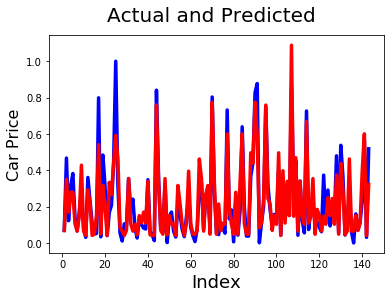

In [1301]:
lm = sm.OLS(y_train,X_train_sm).fit()
y_train_price = lm.predict(X_train_sm)
# Actual vs Predicted
c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_train_price, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

# Residual Analysis

In [1302]:
lm = sm.OLS(y_train,X_train_sm).fit()
y_train_price = lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

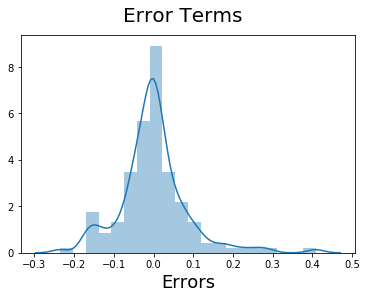

In [1303]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# Error terms seem to be approximately normally distributed,


# Prediction and evaluation

In [1304]:
#scaling the test test
num_vars=['curbweight','enginesize', 'boreratio', 'price','total_mpg']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [1305]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test


In [1306]:
# Now let's use our model to make predictions.
X_train_sm = X_train_sm.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_sm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [1307]:
X_test_new.shape

(62, 5)

In [1308]:
# Making predictions
y_pred = lm.predict(X_test_new)

# r2_score

In [1309]:
#Evaluation of test via comparison y_pred andy_test
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7869033121179818

Text(0, 0.5, 'y_pred')

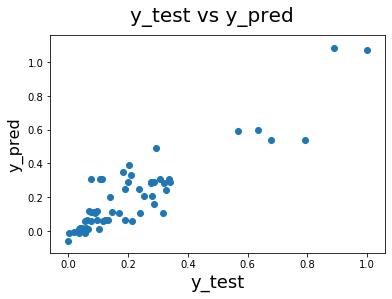

In [1310]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [1311]:
#evaluation of the model using summary statistics
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     176.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.02e-53
Time:                        23:18:41   Log-Likelihood:                 146.48
No. Observations:                 143   AIC:                            -283.0
Df Residuals:                     138   BIC:                            -268.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0832    